# Accretion Disk Evolution and SED

The diffusion equation of a viscous disk 
$$ \frac{\partial \Sigma}{\partial t} = \frac{3}{r}\frac{\partial}{\partial r}\left[ r^{1/2} \frac{\partial}{\partial r} (\nu \Sigma r^{1/2}) \right]$$

In [655]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
import scipy.special as sp_sp
import astropy.constants as ast_const
import astropy.units as ast_u
from scipy import signal
import time
T0 = time.time()

SMALL_SIZE  = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#example 
ic(ast_const.G.value)
print(ast_const.R_sun)

ic| ast_const.G.value: 6.6743e-11


  Name   = Nominal solar radius
  Value  = 695700000.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2015 Resolution B 3


## Part I

Viscosity is constant, $\nu = const$

### 1 a)

Plot the solution at various times and show that the initial ring of material spreads and as
the time proceeds there is a concentration of mass at smaller radii, while some mass are
pushed to large distance to conserve angular momentum.

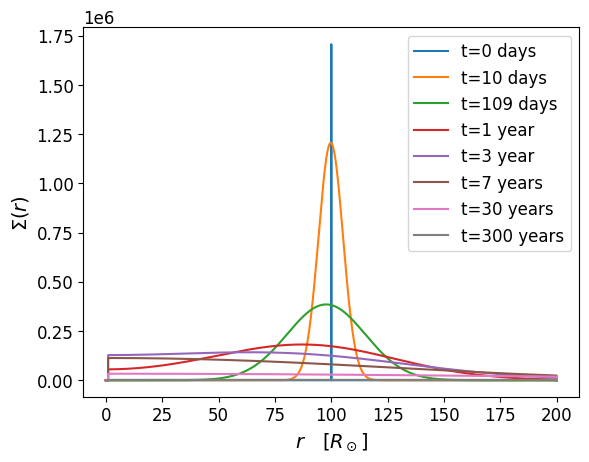

In [656]:
# Use everythinmg in SI units

# initial conditions
M_d = 0.01 * ast_const.M_sun.value  # M_sun
nu_0 = 10**17 * 10**-4              # m^2 s^-1
R_star = 2 * ast_const.R_sun.value  # R_sun
M_star = ast_const.M_sun.value      # M_sun
r_in = R_star
r_out = 200 * R_star
r_0 = r_out / 2

Npts = 10**4
arr_r = np.linspace(0.1,r_out, Npts,dtype=float)   # m
ano = 60*60*24*365.25 #s
dia = 60*60*24 #s
arr_t = np.linspace(0, 300*ano, Npts)  # s

# arr_x = arr_r / r_0
# arr_tau = 12 * nu_0 * arr_t / r_0**2

def Sigma(r,t):
    x = r / r_0
    tau = 12 * nu_0 * t / r_0**2
    if tau == 0:
        imp = signal.unit_impulse(Npts, int(Npts/2))
        sol = M_d / (2*np.pi*r_0) * imp
    else:
        I_14 = sp_sp.iv(1/4, (2*x/tau) )
        sol = M_d/(np.pi*r_0**2) * x**(-1/4) * tau**-1 * np.exp(-(1+x**2)/tau) * I_14 
    
    for i in range(len(sol)):
        if r[i] <= r_in or r[i] >= r_out:
            sol[i]=0

    return sol 

Dens_dist_0     = Sigma(arr_r, arr_t[0])
Dens_dist_1     = Sigma(arr_r, arr_t[1])
Dens_dist_10    = Sigma(arr_r, arr_t[10])
Dens_dist_50    = Sigma(arr_r, arr_t[50])
Dens_dist_100   = Sigma(arr_r, arr_t[100])
Dens_dist_250   = Sigma(arr_r, arr_t[250])
Dens_dist_1000  = Sigma(arr_r, arr_t[1000])
Dens_dist_10000 = Sigma(arr_r, arr_t[-1])

plt.plot(arr_r/R_star, Dens_dist_0*0.75*10**-10,   label=F"t={int(arr_t[0]/dia)} days")
plt.plot(arr_r/R_star, Dens_dist_1,   label=F"t={int(arr_t[1]/dia)} days")
plt.plot(arr_r/R_star, Dens_dist_10,   label=F"t={int(arr_t[10]/dia)} days")
plt.plot(arr_r/R_star, Dens_dist_50,   label=F"t={int(arr_t[50]/ano)} year")
plt.plot(arr_r/R_star, Dens_dist_100,   label=F"t={int(arr_t[100]/ano)} year")
plt.plot(arr_r/R_star, Dens_dist_250, label=F"t={int(arr_t[250]/ano)} years")
plt.plot(arr_r/R_star, Dens_dist_1000, label=F"t={int(arr_t[1000]/ano)} years")
plt.plot(arr_r/R_star, Dens_dist_10000,  label=F"t={int(arr_t[-1]/ano)} years")
plt.legend()
plt.xlabel(r"$r \quad [R_\odot]$")
plt.ylabel(r"$\Sigma(r)$")
plt.savefig("Analytic_Surf_dens.png")

plt.show()

In [657]:
def FWHM(X,Y):
    # Code taken from the second answer
    # https://stackoverflow.com/questions/10582795/finding-the-full-width-half-maximum-of-a-peak
    
    # For FWHM frac = 2, FWtenthM, frac = 10, etc
    frac = 2 # frac is the integer that you want to find the data separation at. 
    
    d = Y - (max(Y) / frac) 
    indexes = np.where(d > 0)[0] 
    return abs(X[indexes[-1]] - X[indexes[0]]) 
    
FWHM_0 = FWHM(arr_r, Dens_dist_0)
FWHM_1 = FWHM(arr_r, Dens_dist_1)
FWHM_10 = FWHM(arr_r, Dens_dist_10)
FWHM_50 = FWHM(arr_r, Dens_dist_50)
FWHM_100 = FWHM(arr_r, Dens_dist_100)
FWHM_250 = FWHM(arr_r, Dens_dist_250)
FWHM_1000 = FWHM(arr_r, Dens_dist_1000)
FWHM_10000 = FWHM(arr_r, Dens_dist_10000)

peak_0 = arr_r[np.argmax(Dens_dist_0)]
peak_1 = arr_r[np.argmax(Dens_dist_1)]
peak_10 = arr_r[np.argmax(Dens_dist_10)]
peak_50 = arr_r[np.argmax(Dens_dist_50)]
peak_100 = arr_r[np.argmax(Dens_dist_100)]
peak_250 = arr_r[np.argmax(Dens_dist_250)]
peak_1000 = arr_r[np.argmax(Dens_dist_1000)]
peak_10000 = arr_r[np.argmax(Dens_dist_10000)]

thetas = np.linspace(0,2*np.pi,Npts)

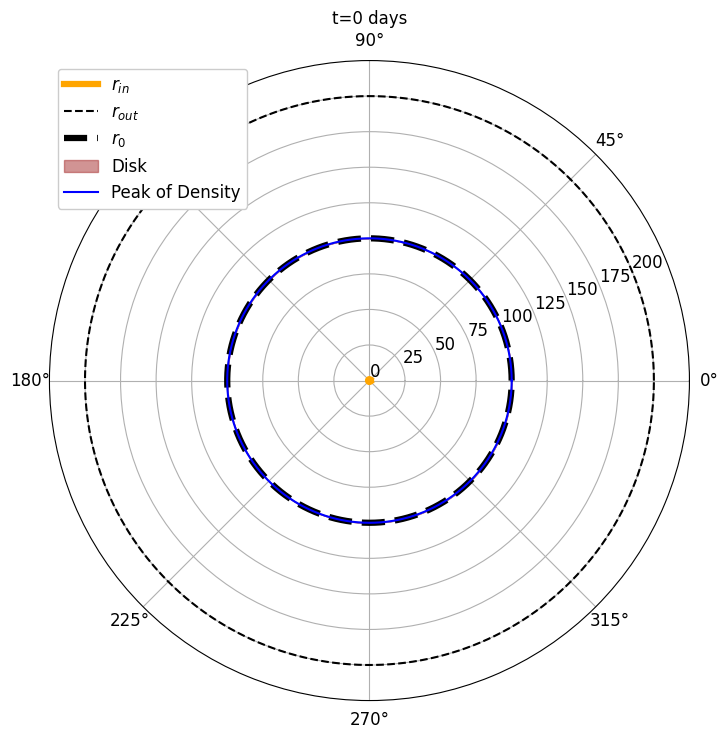

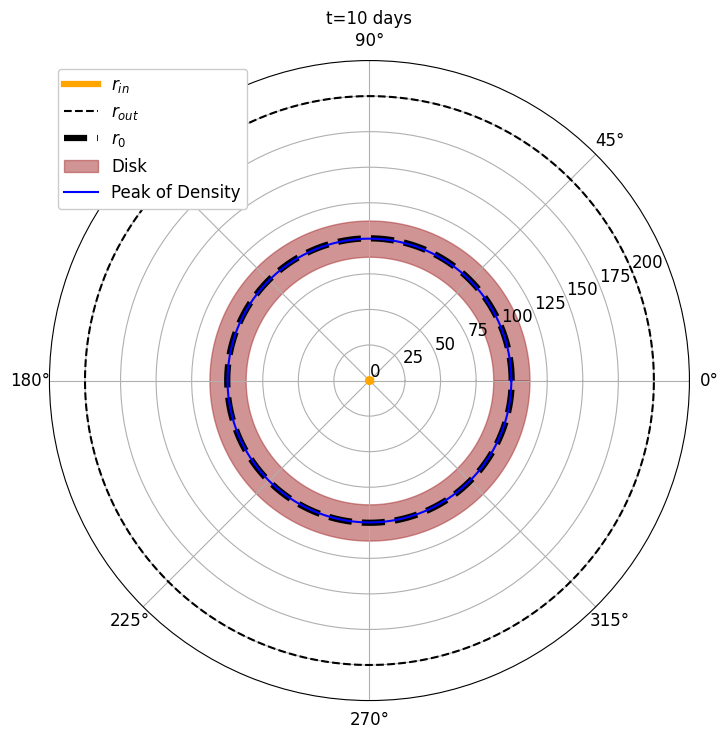

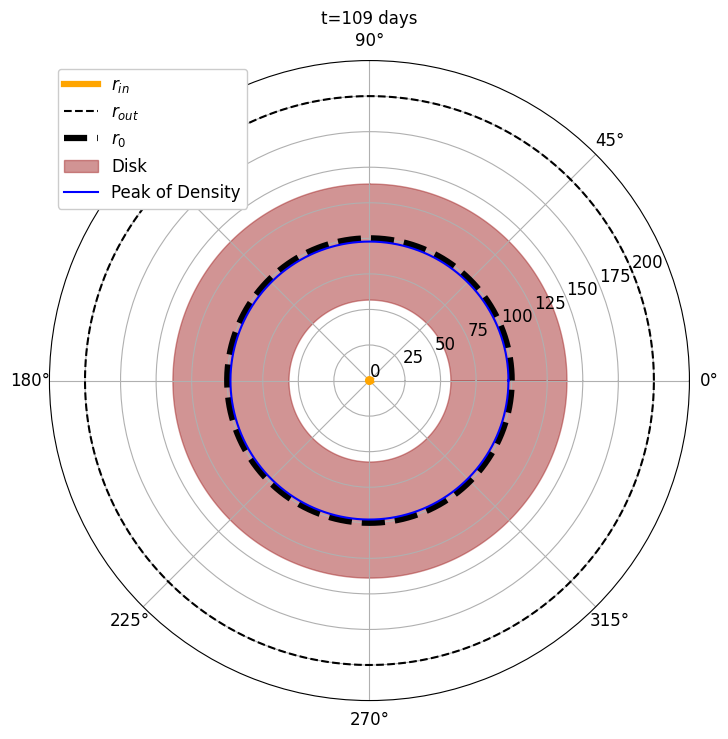

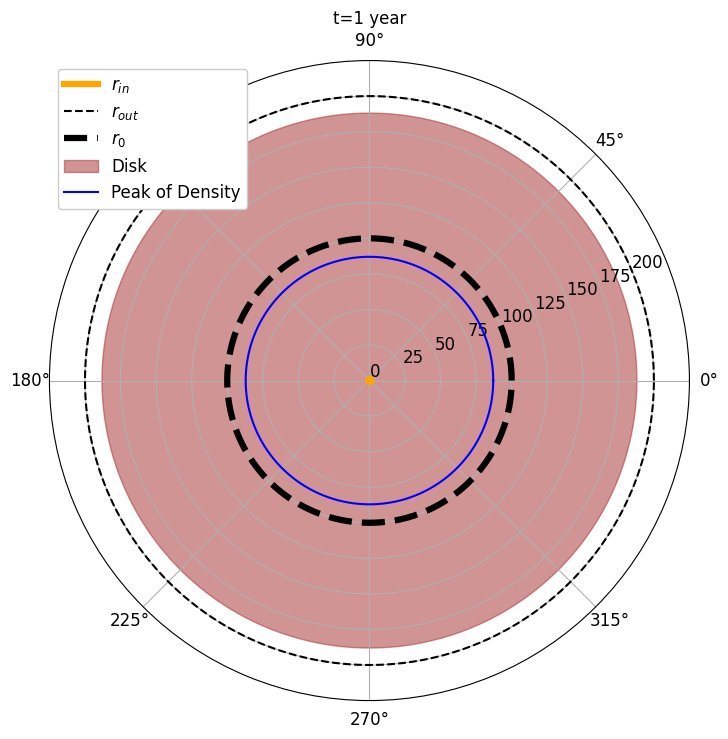

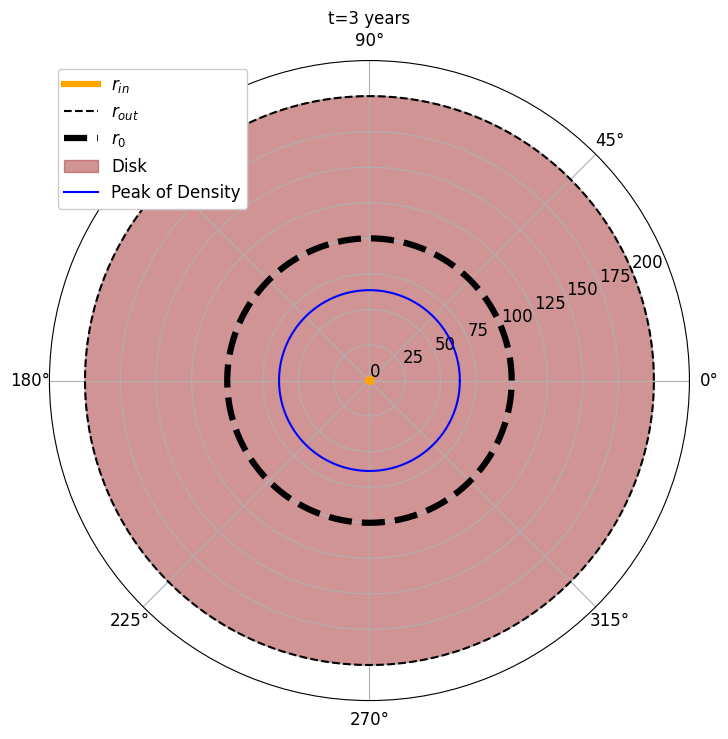

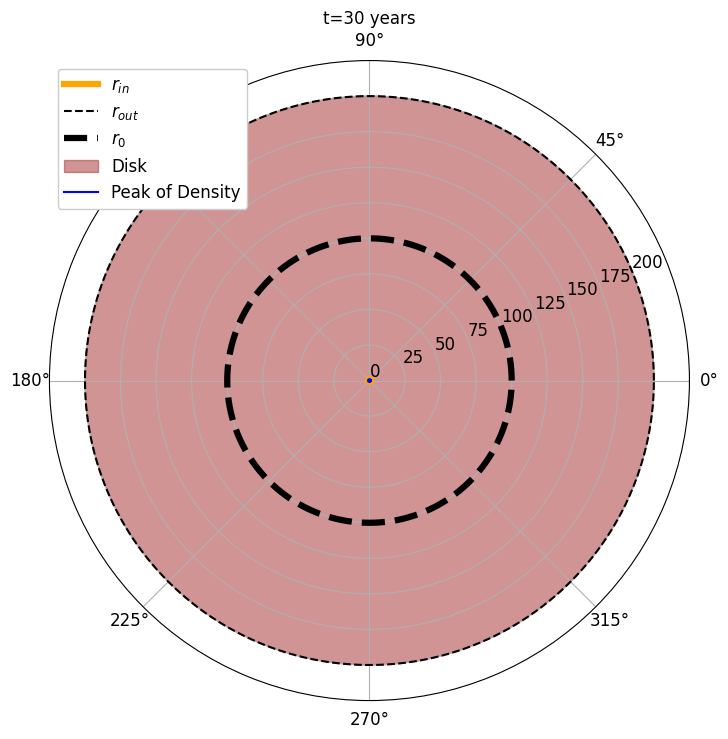

In [658]:
fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
axis.set_ylim(0, 225)
axis.set_yticks(np.arange(0, 225, 25))
axis.plot(thetas, r_in*np.ones(Npts)/R_star,    linewidth=4.5,  color="orange", label=r"$r_{in}$")
axis.plot(thetas, r_out*np.ones(Npts)/R_star,   color="k", linestyle="dashed", label=r"$r_{out}$")
axis.plot(thetas, r_0*np.ones(Npts)/R_star,     linewidth=4.5,linestyle="dashed", color="k", label=r"$r_{0}$")
axis.fill_between(thetas, (peak_0*np.ones(Npts) - FWHM_0)/R_star, (peak_0*np.ones(Npts) + FWHM_0)/R_star,color="brown", alpha=0.5,label="Disk")
axis.plot(thetas, peak_0*np.ones(Npts)/R_star, color="blue", label="Peak of Density")
plt.legend(loc="upper left", framealpha=1)
plt.title(F"t={int(arr_t[0]/dia)} days")
plt.savefig("Disk1.png")
plt.show()

fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
axis.set_ylim(0, 225)
axis.set_yticks(np.arange(0, 225, 25))
axis.plot(thetas, r_in*np.ones(Npts)/R_star,    linewidth=4.5,  color="orange", label=r"$r_{in}$")
axis.plot(thetas, r_out*np.ones(Npts)/R_star,   color="k", linestyle="dashed", label=r"$r_{out}$")
axis.plot(thetas, r_0*np.ones(Npts)/R_star,     linewidth=4.5,linestyle="dashed", color="k", label=r"$r_{0}$")
axis.fill_between(thetas, (peak_1*np.ones(Npts) - FWHM_1)/R_star, (peak_1*np.ones(Npts) + FWHM_1)/R_star,color="brown", alpha=0.5,label="Disk")
axis.plot(thetas, peak_1*np.ones(Npts)/R_star, color="blue", label="Peak of Density")
plt.legend(loc="upper left", framealpha=1)
plt.title(F"t={int(arr_t[1]/dia)} days")
plt.savefig("Disk2.png")
plt.show()

fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
axis.set_ylim(0, 225)
axis.set_yticks(np.arange(0, 225, 25))
axis.plot(thetas, r_in*np.ones(Npts)/R_star,    linewidth=4.5,  color="orange", label=r"$r_{in}$")
axis.plot(thetas, r_out*np.ones(Npts)/R_star,   color="k", linestyle="dashed", label=r"$r_{out}$")
axis.plot(thetas, r_0*np.ones(Npts)/R_star,     linewidth=4.5,linestyle="dashed", color="k", label=r"$r_{0}$")
axis.fill_between(thetas, (peak_10*np.ones(Npts) - FWHM_10)/R_star, (peak_10*np.ones(Npts) + FWHM_10)/R_star,color="brown", alpha=0.5,label="Disk")
axis.plot(thetas, peak_10*np.ones(Npts)/R_star, color="blue", label="Peak of Density")
plt.legend(loc="upper left", framealpha=1)
plt.title(F"t={int(arr_t[10]/dia)} days")
plt.savefig("Disk3.png")
plt.show()

fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
axis.set_ylim(0, 225)
axis.set_yticks(np.arange(0, 225, 25))
axis.plot(thetas, r_in*np.ones(Npts)/R_star,    linewidth=4.5,  color="orange", label=r"$r_{in}$")
axis.plot(thetas, r_out*np.ones(Npts)/R_star,   color="k", linestyle="dashed", label=r"$r_{out}$")
axis.plot(thetas, r_0*np.ones(Npts)/R_star,     linewidth=4.5,linestyle="dashed", color="k", label=r"$r_{0}$")
axis.fill_between(thetas, (peak_50*np.ones(Npts) - FWHM_50)/R_star, (peak_50*np.ones(Npts) + FWHM_50)/R_star, color="brown", alpha=0.5,label="Disk")
axis.plot(thetas, peak_50*np.ones(Npts)/R_star, color="blue", label="Peak of Density")
plt.legend(loc="upper left", framealpha=1)
plt.title(F"t={int(arr_t[50]/ano)} year")
plt.savefig("Disk4.png")
plt.show()

fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
axis.set_ylim(0, 225)
axis.set_yticks(np.arange(0, 225, 25))
axis.plot(thetas, r_in*np.ones(Npts)/R_star,    linewidth=4.5,  color="orange", label=r"$r_{in}$")
axis.plot(thetas, r_out*np.ones(Npts)/R_star,   color="k", linestyle="dashed", label=r"$r_{out}$")
axis.plot(thetas, r_0*np.ones(Npts)/R_star,     linewidth=4.5,linestyle="dashed", color="k", label=r"$r_{0}$")
#Condição fronteira
if ((peak_100 + FWHM_100)/R_star) <= 200:
    axis.fill_between(thetas, (peak_100*np.ones(Npts) - FWHM_100)/R_star, (peak_100*np.ones(Npts) + FWHM_100)/R_star, color="brown", alpha=0.5,label="Disk")
else:
    axis.fill_between(thetas, (peak_100*np.ones(Npts) - FWHM_100)/R_star, 200, color="brown", alpha=0.5,label="Disk")
axis.plot(thetas, peak_100*np.ones(Npts)/R_star, color="blue", label="Peak of Density")
plt.legend(loc="upper left", framealpha=1)
plt.title(F"t={int(arr_t[100]/ano)} years")
plt.savefig("Disk5.png")
plt.show()

fig = plt.figure(figsize=(8,8))
axis = fig.add_axes([0.1,0.1,0.8,0.8],polar=True)
axis.set_ylim(0, 225)
axis.set_yticks(np.arange(0, 225, 25))
axis.plot(thetas, r_in*np.ones(Npts)/R_star,    linewidth=4.5,  color="orange", label=r"$r_{in}$")
axis.plot(thetas, r_out*np.ones(Npts)/R_star,   color="k", linestyle="dashed", label=r"$r_{out}$")
axis.plot(thetas, r_0*np.ones(Npts)/R_star,     linewidth=4.5,linestyle="dashed", color="k", label=r"$r_{0}$")
axis.fill_between(thetas, (peak_1000*np.ones(Npts) - FWHM_1000)/R_star, (peak_1000*np.ones(Npts) + FWHM_1000)/R_star, color="brown", alpha=0.5,label="Disk")
axis.plot(thetas, peak_1000*np.ones(Npts)/R_star, color="blue", label="Peak of Density")
plt.legend(loc="upper left", framealpha=1)
plt.title(F"t={int(arr_t[1000]/ano)} years")
plt.savefig("Disk6.png")
plt.show()

Here we have 
- ploted the solution for increasing time
- shown that the initial ring of material, $r_0$ spreads as time increases
- Shown that, as time proceeds, there is a concentration of mass at smaller radii, since the peak of the density (represented by the blue line in the graphs), is moving closer and closer to the star
- shown that some mass of the disk is pushed to large distances, in order to conserve the angular momentum  

### 1 b)

Show how the diffusion evolution time scale changes with increasing the viscosity

C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1566010179.py:73: RuntimeWarning: invalid value encountered in multiply
  sol = M_d/(np.pi*r_0**2) * x**(-1/4) * tau**-1 * np.exp(-(1+x**2)/tau) * I_14


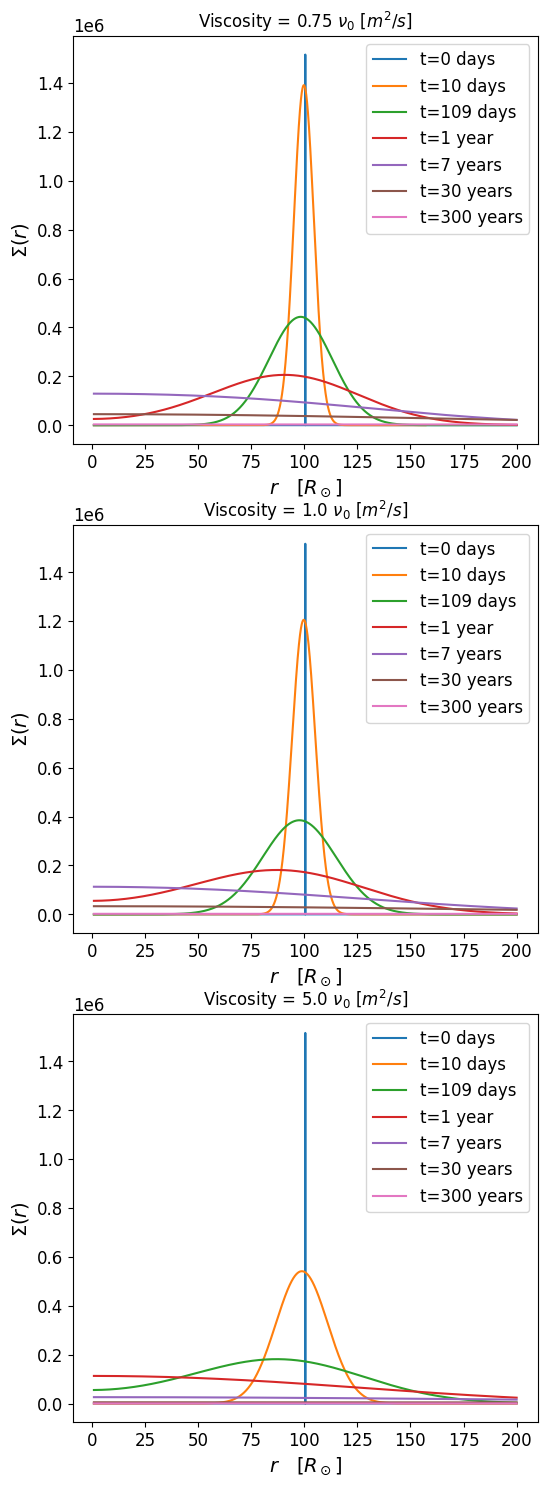

In [659]:
# Use everythinmg in SI units

# initial conditions
M_d = 0.01 * ast_const.M_sun.value  # M_sun
nu_0 = 10**17 * 10**-4              # m^2 s^-1
R_star = 2 * ast_const.R_sun.value  # R_sun
M_star = ast_const.M_sun.value      # M_sun
r_in = R_star
r_out = 200 * R_star
r_0 = r_out / 2

Npts = 10**4
arr_r = np.linspace(r_in,r_out, Npts,dtype=float)   # m
# arr_t = np.linspace(0,10**9, Npts)  # s

arr_x = arr_r / r_0

# values = np.array([0.75, 1, 2, 5])
# ind_x= 0
# ind_y= 0
# fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
# for v in values:
#     arr_tau = 12 * nu_0*v * arr_t / r_0**2

#     def Sigma(x,tau):
#         if tau == 0:
#             imp = signal.unit_impulse(Npts, int(Npts/2))
#             sol = M_d / (2*np.pi*r_0) * imp
#         else:
#             I_14 = sp_sp.iv(1/4, (2*x/tau) )
#             sol = M_d/(np.pi*r_0**2) * x**(-1/4) * tau**-1 * np.exp(-(1+x**2)/tau) * I_14 
#         return sol 

#     Dens_dist_0     = Sigma(arr_x, arr_tau[0])
#     Dens_dist_1     = Sigma(arr_x, arr_tau[1])
#     Dens_dist_10    = Sigma(arr_x, arr_tau[10])
#     Dens_dist_50    = Sigma(arr_x, arr_tau[50])
#     Dens_dist_250   = Sigma(arr_x, arr_tau[250])
#     Dens_dist_1000  = Sigma(arr_x, arr_tau[1000])
#     Dens_dist_10000 = Sigma(arr_x, arr_tau[-1])
    
#     ax[ind_x, ind_y].plot(arr_r/R_star, Dens_dist_0/(1.5*10**10),   label=F"t={int(arr_t[0]/dia)} days")
#     ax[ind_x, ind_y].plot(arr_r/R_star, Dens_dist_1,    label=F"t={int(arr_t[1]/dia)} days")
#     ax[ind_x, ind_y].plot(arr_r/R_star, Dens_dist_10,   label=F"t={int(arr_t[10]/dia)} days")
#     ax[ind_x, ind_y].plot(arr_r/R_star, Dens_dist_50,   label=F"t={int(arr_t[50]/ano)} year")
#     ax[ind_x, ind_y].plot(arr_r/R_star, Dens_dist_250,  label=F"t={int(arr_t[250]/ano)} years")
#     ax[ind_x, ind_y].plot(arr_r/R_star, Dens_dist_1000, label=F"t={int(arr_t[1000]/ano)} years")
#     ax[ind_x, ind_y].plot(arr_r/R_star, Dens_dist_10000,label=F"t={int(arr_t[-1]/ano)} years")
#     ax[ind_x, ind_y].legend()
#     ax[ind_x, ind_y].set_xlabel(r"$r \quad [R_\odot]$")
#     ax[ind_x, ind_y].set_ylabel(r"$\Sigma(r)$")
#     ax[ind_x, ind_y].set_title(r"Viscosity = {} $\nu_0 \ [m^2 /s]$".format(v))
    
#     if ind_x == 0 and ind_y == 0:
#         ind_y = 1
#     elif ind_x == 0 and ind_y == 1:
#         ind_x = 1
#         ind_y = 0
#     elif ind_x == 1 and ind_y == 0:
#         ind_y = 1
values = np.array([0.75, 1, 5])
index = 0
fig,ax = plt.subplots(nrows=3,ncols=1,figsize=(6,18))
for v in values:
    arr_tau = 12 * nu_0*v * arr_t / r_0**2

    def Sigma(x,tau):
        if tau == 0:
            imp = signal.unit_impulse(Npts, int(Npts/2))
            sol = M_d / (2*np.pi*r_0) * imp
        else:
            I_14 = sp_sp.iv(1/4, (2*x/tau) )
            sol = M_d/(np.pi*r_0**2) * x**(-1/4) * tau**-1 * np.exp(-(1+x**2)/tau) * I_14 
        return sol 

    Dens_dist_0     = Sigma(arr_x, arr_tau[0])
    Dens_dist_1     = Sigma(arr_x, arr_tau[1])
    Dens_dist_10    = Sigma(arr_x, arr_tau[10])
    Dens_dist_50    = Sigma(arr_x, arr_tau[50])
    Dens_dist_250   = Sigma(arr_x, arr_tau[250])
    Dens_dist_1000  = Sigma(arr_x, arr_tau[1000])
    Dens_dist_10000 = Sigma(arr_x, arr_tau[-1])
    
    ax[index].plot(arr_r/R_star, Dens_dist_0/(1.5*10**10),   label=F"t={int(arr_t[0]/dia)} days")
    ax[index].plot(arr_r/R_star, Dens_dist_1,    label=F"t={int(arr_t[1]/dia)} days")
    ax[index].plot(arr_r/R_star, Dens_dist_10,   label=F"t={int(arr_t[10]/dia)} days")
    ax[index].plot(arr_r/R_star, Dens_dist_50,   label=F"t={int(arr_t[50]/ano)} year")
    ax[index].plot(arr_r/R_star, Dens_dist_250,  label=F"t={int(arr_t[250]/ano)} years")
    ax[index].plot(arr_r/R_star, Dens_dist_1000, label=F"t={int(arr_t[1000]/ano)} years")
    ax[index].plot(arr_r/R_star, Dens_dist_10000,label=F"t={int(arr_t[-1]/ano)} years")
    ax[index].legend()
    ax[index].set_xlabel(r"$r \quad [R_\odot]$")
    ax[index].set_ylabel(r"$\Sigma(r)$")
    ax[index].set_title(r"Viscosity = {} $\nu_0 \ [m^2 /s]$".format(v))
    
    index +=1

plt.savefig("Analytic_Surf_Dens_Viscosity.png")
plt.show()

Determinar/explicitar a diferença de tempos entre o pico inicial e o pico em r_in deve cheagr

### 2 a)

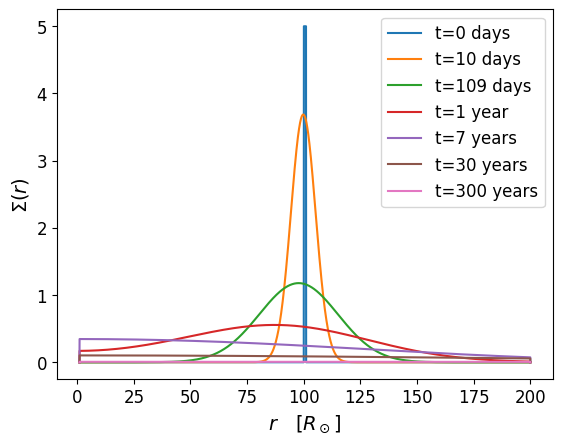

In [660]:
#  sigma(r,t)  = f(i,j)

def Sigma2(r,t):
    delta_r = R_star
    N = 200
    k1 = N/2
    r1 = k1*delta_r
    r_out = N * delta_r

    if t < 0.01:
        if k1 < r/delta_r < k1+1 :
            sol = 1
        else:
            sol = 0
    elif r == r_out or r == delta_r :
        sol = 0
    else:        
        x = r / r1
        tau = 12 * nu_0 * t / r1**2
        I_14 = sp_sp.iv(1/4, (2*x/tau) )
        sol = M_d/(np.pi*r_0**2) * x**(-1/4) * tau**-1 * np.exp(-(1+x**2)/tau) * I_14 
    return sol 

def Sig_int(f, rs, t, nu):
    arr_final = np.empty( len(rs))
    i=0
    for r in rs:
        effe = f(r,t) + 3*nu / (r * R_star**2)* ( 3/2 * (f(r+1,t)-f(r,t)) + r*(f(r+1,t)-2*f(r,t)+f(r-1,t)) )
        arr_final[i] = effe
        i+=1

    return arr_final

# nu_0 = 10**17 * 10**-4
Int0 =      Sig_int(Sigma2, arr_r, arr_t[0],    nu = nu_0 )
Int1 =      Sig_int(Sigma2, arr_r, arr_t[1],    nu = nu_0 )
Int10 =     Sig_int(Sigma2, arr_r, arr_t[10],   nu = nu_0 )
Int50 =     Sig_int(Sigma2, arr_r, arr_t[50],   nu = nu_0 )
Int100 =    Sig_int(Sigma2, arr_r, arr_t[100],  nu = nu_0 )
Int250 =    Sig_int(Sigma2, arr_r, arr_t[250],  nu = nu_0 )
Int1000 =   Sig_int(Sigma2, arr_r, arr_t[1000], nu = nu_0 )
Int10000 =  Sig_int(Sigma2, arr_r, arr_t[-1],   nu = nu_0 )

plt.plot(arr_r/R_star, Int0 * 5,                        label=F"t={int(arr_t[0])} days")
plt.plot(arr_r/R_star, Int1/ (M_d/(np.pi*r_0**2)),      label=F"t={int(arr_t[1]/dia)} days")
plt.plot(arr_r/R_star, Int10/ (M_d/(np.pi*r_0**2)),     label=F"t={int(arr_t[10]/dia)} days"  )
plt.plot(arr_r/R_star, Int50/ (M_d/(np.pi*r_0**2)),     label=F"t={int(arr_t[50]/ano)} year"  )
plt.plot(arr_r/R_star, Int250/ (M_d/(np.pi*r_0**2)),    label=F"t={int(arr_t[250]/ano)} years" )
plt.plot(arr_r/R_star, Int1000/ (M_d/(np.pi*r_0**2)),   label=F"t={int(arr_t[1000]/ano)} years")
plt.plot(arr_r/R_star, Int10000/(M_d/(np.pi*r_0**2)),   label=F"t={int(arr_t[-1]/ano)} years")
plt.legend()
plt.xlabel(r"$r \quad [R_\odot]$")
plt.ylabel(r"$\Sigma(r)$")

plt.savefig("Numerical_Surf_Dens.png")
plt.show()

### 2 b)

C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\3354366363.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  sol[i] = M_d/(np.pi*r_0**2) * x**(-1/4) * tau**-1 * np.exp(-(1+x**2)/tau) * I_14


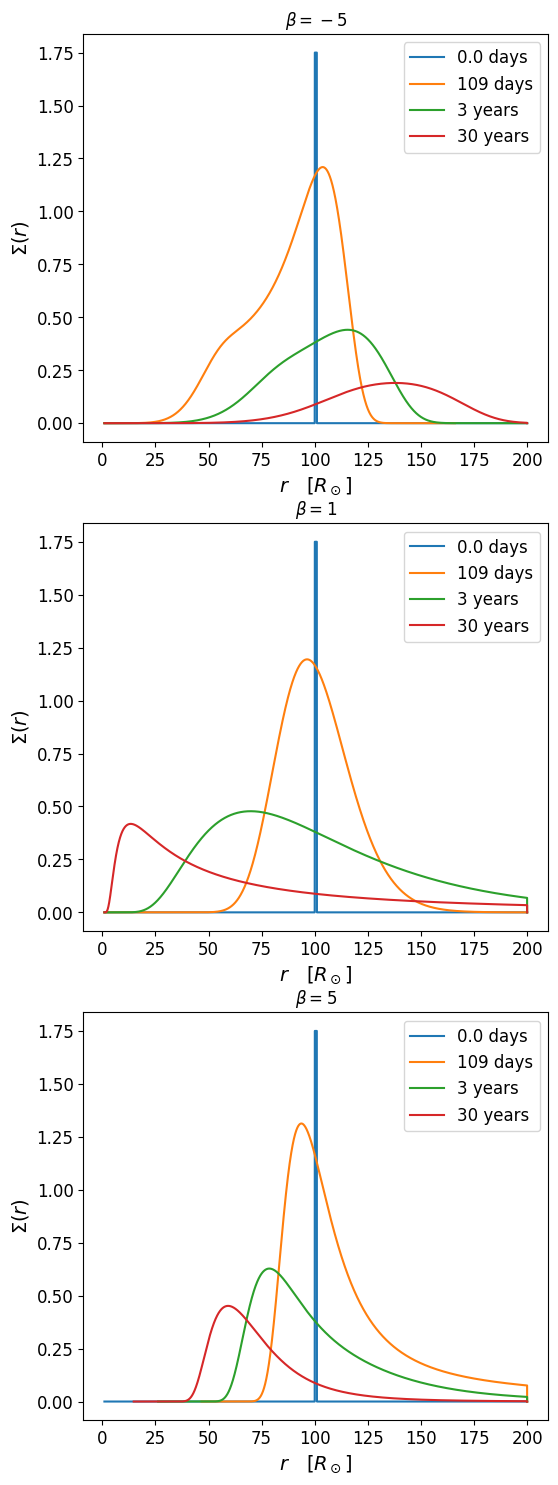

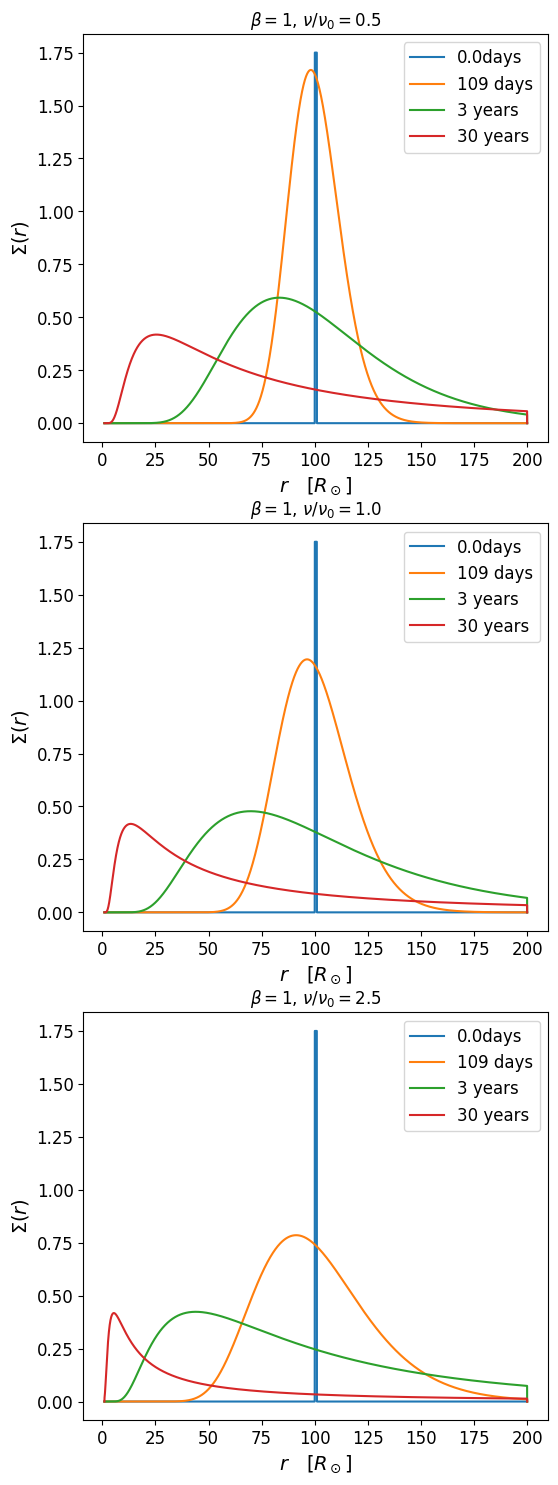

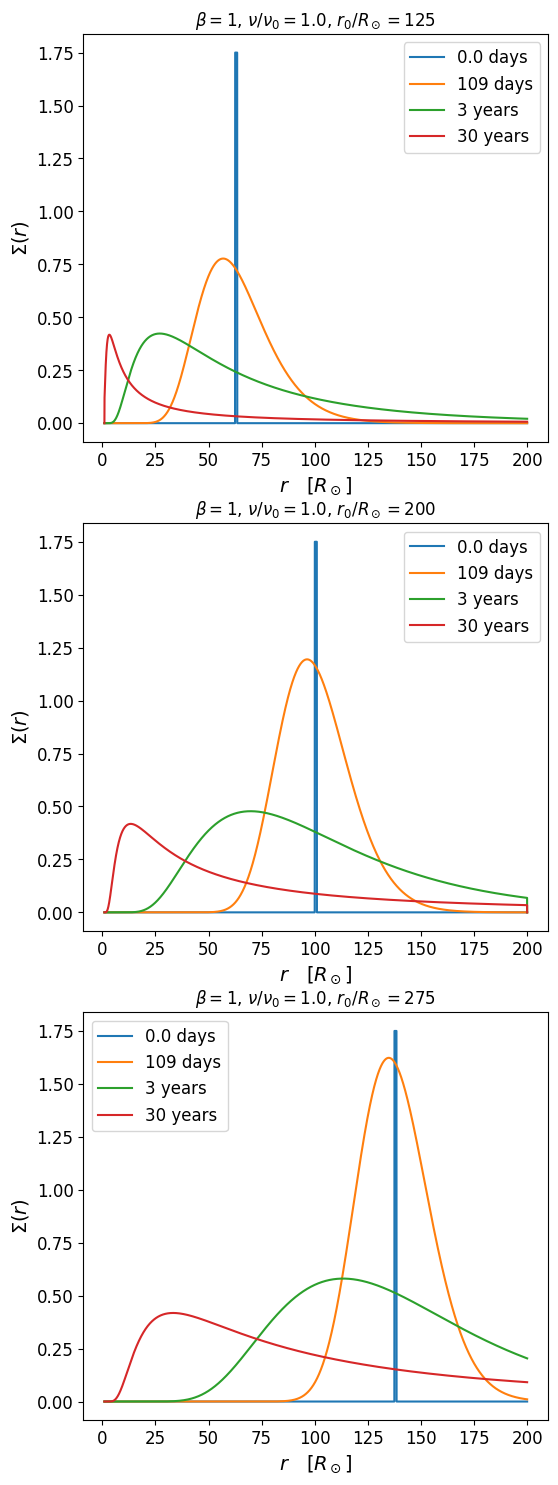

In [661]:
def Sigma_visc(r,t, visc_0, beta, N=200):
    delta_r = R_star
    k1 = N/2
    r1 = k1*delta_r
    r_out = N * delta_r

    sol = np.empty(len(r))
    for i in range(len(r)):
        visc = visc_0 * (r[i]/r1)**beta
        if t < 0.01:
            if k1 < r[i]/delta_r < k1+1 :
                sol[i] = 1
            else:
                sol[i] = 0
        elif r[i] == r_out or r[i] == delta_r :
            sol[i] = 0
        else:        
            x = r[i] / r1
            tau = 12 * visc * t / r1**2
            I_14 = sp_sp.iv(1/4, (2*x/tau) )
            sol[i] = M_d/(np.pi*r_0**2) * x**(-1/4) * tau**-1 * np.exp(-(1+x**2)/tau) * I_14 
    return sol

betas = [-5,1,5]
fig,axis = plt.subplots(nrows=3,ncols=1,figsize=(6,18))
for i in range( len(betas) ):
    Sig_visc0 = Sigma_visc(arr_r, arr_t[0], 10**17 * 10**-4,        betas[i]) 
    Sig_visc10 = Sigma_visc(arr_r, arr_t[10],  10**17 * 10**-4,     betas[i]) 
    Sig_visc100 = Sigma_visc(arr_r, arr_t[100],  10**17 * 10**-4,   betas[i]) 
    Sig_visc1000 = Sigma_visc(arr_r, arr_t[1000],  10**17 * 10**-4, betas[i]) 
    
    axis[i].plot(arr_r/R_star, Sig_visc0*1.75,                         label=F"{arr_t[0]} days")
    axis[i].plot(arr_r/R_star, Sig_visc10/ (M_d/(np.pi*r_0**2)),    label=F"{int(arr_t[10]/dia)} days" )
    axis[i].plot(arr_r/R_star, Sig_visc100/ (M_d/(np.pi*r_0**2)),   label=F"{int(arr_t[100]/ano)} years" )
    axis[i].plot(arr_r/R_star, Sig_visc1000/ (M_d/(np.pi*r_0**2)),  label=F"{int(arr_t[1000]/ano)} years" )
    axis[i].set_title(Fr"$\beta = {betas[i]}$" )
    axis[i].legend(loc="upper right")
    axis[i].set_xlabel(r"$r \quad [R_\odot]$")
    axis[i].set_ylabel(r"$\Sigma(r)$")

plt.savefig("Numerical_Surf_Dens_betas.png")
plt.show()

nu_0 = 10**17 * 10**-4
viscs = [0.5*nu_0, 1*nu_0, 2.5*nu_0]
fig,axis = plt.subplots(nrows=3,ncols=1,figsize=(6,18))
for i in range( len(viscs) ):
    Sig_visc0_2 = Sigma_visc(arr_r, arr_t[0],       viscs[i],   betas[1] ) 
    Sig_visc10_2 = Sigma_visc(arr_r, arr_t[10],     viscs[i],   betas[1] ) 
    Sig_visc100_2 = Sigma_visc(arr_r, arr_t[100],   viscs[i],   betas[1] ) 
    Sig_visc1000_2 = Sigma_visc(arr_r, arr_t[1000], viscs[i],   betas[1] ) 

    axis[i].plot(arr_r/R_star, Sig_visc0_2*1.75,                       label=F"{arr_t[0]}days")
    axis[i].plot(arr_r/R_star, Sig_visc10_2/ (M_d/(np.pi*r_0**2)),  label=F"{int(arr_t[10]/dia)} days")
    axis[i].plot(arr_r/R_star, Sig_visc100_2/ (M_d/(np.pi*r_0**2)), label=F"{int(arr_t[100]/ano)} years")
    axis[i].plot(arr_r/R_star, Sig_visc1000_2/ (M_d/(np.pi*r_0**2)),label=F"{int(arr_t[1000]/ano)} years")
    axis[i].set_title(Fr"$\beta ={betas[1]}$, $\nu / \nu_0 = {viscs[i]/nu_0}$")
    axis[i].legend(loc="upper right")
    axis[i].set_xlabel(r"$r \quad [R_\odot]$")
    axis[i].set_ylabel(r"$\Sigma(r)$")

plt.savefig("Numerical_Surf_Dens_visc.png")
plt.show()

Ns = [125, 200, 275]
fig,axis = plt.subplots(nrows=3,ncols=1,figsize=(6,18))
for i in range( len(Ns) ):
    Sig_visc0_3 = Sigma_visc(arr_r, arr_t[0],       viscs[1],   betas[1], N=Ns[i] ) 
    Sig_visc10_3 = Sigma_visc(arr_r, arr_t[10],     viscs[1],   betas[1], N=Ns[i] ) 
    Sig_visc100_3 = Sigma_visc(arr_r, arr_t[100],   viscs[1],   betas[1], N=Ns[i] ) 
    Sig_visc1000_3 = Sigma_visc(arr_r, arr_t[1000], viscs[1],   betas[1], N=Ns[i] )

    axis[i].plot(arr_r/R_star, Sig_visc0_3*1.75,                       label=F"{arr_t[0]} days")
    axis[i].plot(arr_r/R_star, Sig_visc10_3/ (M_d/(np.pi*r_0**2)),  label=F"{int(arr_t[10]/dia)} days")
    axis[i].plot(arr_r/R_star, Sig_visc100_3/ (M_d/(np.pi*r_0**2)), label=F"{int(arr_t[100]/ano)} years")
    axis[i].plot(arr_r/R_star, Sig_visc1000_3/ (M_d/(np.pi*r_0**2)),label=F"{int(arr_t[1000]/ano)} years")
    axis[i].set_title(Fr"$\beta ={betas[1]}$, $\nu / \nu_0 = {viscs[1]/nu_0}$, $r_0/R_\odot = {Ns[i]}$")
    axis[i].legend()
    axis[i].set_xlabel(r"$r \quad [R_\odot]$")
    axis[i].set_ylabel(r"$\Sigma(r)$")

plt.savefig("Numerical_Surf_Dens_r_0.png")
plt.show()


# arr_t2 = np.linspace(0, 3*10**5*ano, Npts)
# Sig_visc0_4 = Sigma_visc(arr_r,     arr_t2[0],       viscs[0],   betas[1], N=Ns[1] ) 
# Sig_visc10_4 = Sigma_visc(arr_r,    arr_t2[10],     viscs[0],   betas[1], N=Ns[1] ) 
# Sig_visc100_4 = Sigma_visc(arr_r,   arr_t2[100],   viscs[0],   betas[1], N=Ns[1] ) 
# Sig_visc1000_4 = Sigma_visc(arr_r,  arr_t2[1000], viscs[0],   betas[1], N=Ns[1] )
# Sig_visc1000_4 = Sigma_visc(arr_r,  arr_t2[-1], viscs[0],   betas[1], N=Ns[1] )

# fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,5))
# ax.plot(arr_r/R_star, Sig_visc0_4*2,                        label=F"{int(arr_t2[0]/ano)}   years")
# ax.plot(arr_r/R_star, Sig_visc10_4/ (M_d/(np.pi*r_0**2)),   label=F"{int(arr_t2[10]/ano)}  years")
# ax.plot(arr_r/R_star, Sig_visc100_4/ (M_d/(np.pi*r_0**2)),  label=F"{int(arr_t2[100]/ano)} years")
# ax.plot(arr_r/R_star, Sig_visc1000_4/ (M_d/(np.pi*r_0**2)), label=F"{int(arr_t2[1000]/ano)}years")
# ax.plot(arr_r/R_star, Sig_visc1000_4/ (M_d/(np.pi*r_0**2)), label=F"{int(arr_t2[-1]/ano)}  years")
# ax.set_title(Fr"$\beta ={betas[1]}$, $\nu / \nu_0 = {viscs[0]/nu_0}$, $r_0/R_\odot = {Ns[1]}$")
# ax.legend()
# plt.show()

## Part II

### 1 a)

In [662]:
# Use everythinmg in SI units
pc_in_m = ast_const.pc.value        # m

# initial conditions
M_star = ast_const.M_sun.value      # kg
R_star = 2 * ast_const.R_sun.value  # m
T_eff = 4500                        # K
d_star = 140 * pc_in_m              # m
Inclination = 60 * np.pi/180        # rad
VsenI = 10*10**3                    # m/s
Mass_accr = 10**-7 * M_star / ano   # kg/s

i) Stellar emission

In [663]:
def B_lambe(T, lambe):
    h = ast_const.h.value       # J s
    c = ast_const.c.value       # m/s
    k_B = ast_const.k_B.value   # J/K
    B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)
    return B

def F_star_l(T, nu):
    B = B_lambe(T,nu)
    return np.pi * B

def F_obs(F_str, R_str, d):
    return F_str * (R_str/ d)**2

Npts = 1000
arr_lambe = np.linspace(100, 10**5 , Npts ) * 10**-10 # m

Fluxes_S_l = F_star_l(T_eff, arr_lambe)
Fluxes_obs_l = F_obs(Fluxes_S_l, R_star, d_star)

ii) Disk emission due to viscosity

In [664]:
def IntegralSimp_l(func,a,b,N, lambe): # a=0 , b=2
    h = (b-a)/N
    somaPar = 0
    somaImpar = 0
    for k in range(2,N,2): #valores pares de k
        somaPar += func(a + k*h, lambe )
    for k in range(1,N,2): #valores ímpares de k
        somaImpar += func(a + k*h, lambe)
    return 1/3 * h * (func(a, lambe) + func(b, lambe) + 4*somaImpar + 2*somaPar)

def F_Disk_visc_lambe(i, d, lambe, rs, M_s=ast_const.M_sun.value, Mass_accr=Mass_accr, R_star=2*ast_const.R_sun.value):
    def T_d2(r, M_star=M_s, M_accr=Mass_accr):
        return (3*G*M_star*M_accr / (8*np.pi*r**3*sigma_SB) * (1-(R_star/r)**(1/2)))**(1/4)
    
    def func_Int_l(r, lambe):
        return B_lambe(T_d2(r), lambe)*r
    
    IntSimp = IntegralSimp_l(func_Int_l, rs[0], rs[-1], Npts, lambe)
    flux = 2*np.pi*np.cos(i)/d**2 * IntSimp
    
    return flux

h = ast_const.h.value       # J s
c = ast_const.c.value       # m/s
k_B = ast_const.k_B.value   # J/K
M_accr = 10**-7 * ast_const.M_sun.value/ano
G = ast_const.G.value
sigma_SB = ast_const.sigma_sb.value


Flux_DiskVisc_l = np.empty(Npts)
arr_r2 = np.linspace(r_in, r_out, Npts)
for index in range(Npts):
    Flux_DiskVisc_l[index] = F_Disk_visc_lambe(Inclination, d_star, arr_lambe[index], arr_r2)

# fig,axis = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
# axis[0].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, label="Emitted by Disk Viscosity")
# axis[0].set_xlabel(r"$\lambda$ (nm)")
# axis[0].set_ylabel(r"$\lambda F_\lambda$ ")
# axis[0].legend()
# axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe, label="Emittion Observed by star")
# axis[1].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, label="Emitted by Disk Viscosity")
# axis[1].set_xlabel(r"$\lambda$ (nm)")
# axis[1].set_ylabel(r"$\lambda F_\lambda$ ")
# axis[1].legend()
# plt.show()

# fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(15,6))
# axis.plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe, label="Emittion Observed by star")
# axis.plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, label="Emitted by Disk Viscosity")
# axis.plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe + Fluxes_obs_l*arr_lambe, color="k", label="Emitted by Disk Viscosity")
# axis.set_xlabel(r"$\lambda$ (nm)")
# axis.set_ylabel(r"$\lambda F_\lambda$ ")
# axis.legend()
# plt.show()

C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: overflow encountered in exp
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)


iii) Disk emission caused by stellar irradiation

In [665]:
def F_irr(l, rr, Teff = T_eff):

    def F_irr_lambe(l,rr):
        return B_lambe(Teff,l) * ( np.arcsin(R_star/rr) - (R_star / rr) * (1 - (R_star / rr)**2)**0.5 ) 

    def Tirr_(l,rr):
        fiir = np.zeros(len(rr))
        # para todos os rs integrar em v
        for i in range(len(rr)):
            M = 2000
            h = (l[-1]-l[0])/M
            t = np.linspace(l[0],l[-1],M+1)
            y = F_irr_lambe(t,rr[i])
    
            fiir[i]= (h/3)*np.sum(y[1::2]*4+y[:-1:2]+y[2::2])
        
        return (fiir / sigma_SB) ** (1/4)

    M = 2000
    b = r_out
    a = r_in
    h = (b-a)/M
    t = np.linspace(a,b,M+1)
    
    #temperatura de irradiacao para todos as posicoes
    tirr = Tirr_(l,t)

    int2 = np.zeros((len(l)), dtype = float) 
    
    #integrar para cada l
    for i in range(len(l)):
        
        y = B_lambe(tirr, l[i])*rr

        int2[i] = (h/3)*np.sum(y[1::2]*4+y[:-1:2]+y[2::2])

    return 2 * np.pi * np.cos(Inclination) / d_star**2 * int2

rr = np.linspace(r_in, r_out, 2000+1)
Flux_Disk_irr = F_irr(arr_lambe, rr)

C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: overflow encountered in exp
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)


iv) Boundary layer emission

In [666]:
h = ast_const.h.value               # J s
c = ast_const.c.value               # m/s
k_B = ast_const.k_B.value           # J/K
sigma_SB = ast_const.sigma_sb.value # W / (K^4 m^2)
G = ast_const.G.value               # m^3 / (kg s^2)
m_H = ast_const.m_p.value + ast_const.m_e.value # kg
mu = 0.615 

def F_Disk_BL(i, d, lambe, M_star=M_star, Mass_accr=Mass_accr, R_star=R_star):    
    T_in = ( 3*G*M_star*Mass_accr / (8*np.pi*sigma_SB*R_star**3) )**(1/4)
    c_s = (k_B*T_in/(mu*m_H))**(1/2)
    H = ( R_star**3/(G*M_star) * c_s**2 )**(1/2)
    T_BL = T_in*( R_star/(3*H) )**(1/4)  # K
    Intensity = B_lambe( T_BL , lambe)
        
    flux = 2*np.pi*np.cos(i)/d**2 * R_star*H * Intensity
    return flux

Flux_Disk_BL = F_Disk_BL(Inclination, d_star, arr_lambe)

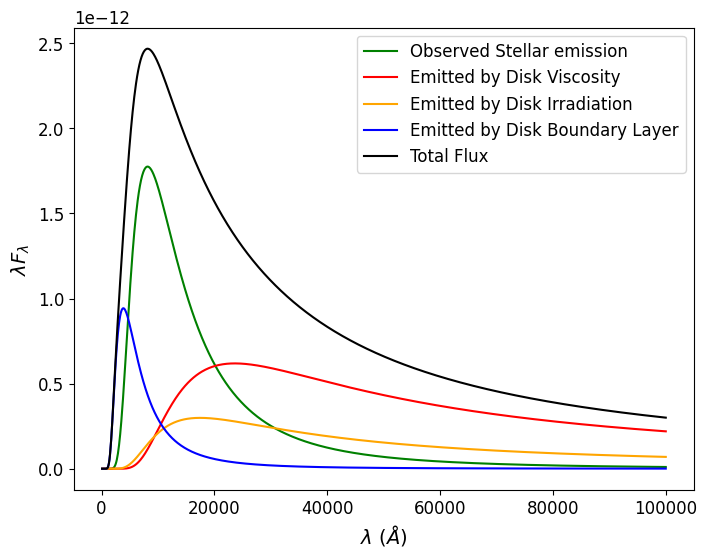

In [667]:
fig,axis = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
axis.plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe, color="green", label="Observed Stellar emission")
axis.plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, color="red", label="Emitted by Disk Viscosity")
axis.plot(arr_lambe/10**-10, Flux_Disk_irr*arr_lambe, color="orange", label="Emitted by Disk Irradiation")
axis.plot(arr_lambe/10**-10, Flux_Disk_BL*arr_lambe, color="blue", label="Emitted by Disk Boundary Layer")
axis.plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe + Flux_DiskVisc_l*arr_lambe  
          + Flux_Disk_irr*arr_lambe + Flux_Disk_BL*arr_lambe , color="k", label="Total Flux")
axis.set_xlabel(r"$\lambda$ ($\AA$)")
axis.set_ylabel(r"$\lambda F_\lambda$ ")
axis.legend()
plt.savefig("SED.png")
plt.show()

### 1 b)

In [668]:
M_star2 = 0.5*ast_const.M_sun.value
M_star3 = 2*ast_const.M_sun.value

T_eff2 = 4000 
T_eff3 = 5000 

Mass_accr2 = 10**-8 * ast_const.M_sun.value / ano
Mass_accr3 = 10**-6 * ast_const.M_sun.value / ano

Variation in Mass

In [669]:
# Stellar Component
Fluxes_S_l2 = F_star_l(T_eff, arr_lambe)
Fluxes_obs_l2 = F_obs(Fluxes_S_l2, R_star, d_star)

Fluxes_S_l3 = F_star_l(T_eff, arr_lambe)
Fluxes_obs_l3 = F_obs(Fluxes_S_l3, R_star, d_star)

# Viscosity Component
Flux_DiskVisc_2 = np.empty(Npts)
for index in range(Npts):
    Flux_DiskVisc_2[index] = F_Disk_visc_lambe(Inclination, d_star, arr_lambe[index], arr_r2, M_s=M_star2)

Flux_DiskVisc_3 = np.empty(Npts)
for index in range(Npts):
    Flux_DiskVisc_3[index] = F_Disk_visc_lambe(Inclination, d_star, arr_lambe[index], arr_r2, M_s=M_star3)

# Irradiation Component
Flux_Disk_irr2 = F_irr(arr_lambe, rr)
Flux_Disk_irr3 = F_irr(arr_lambe, rr)

# Boundary Layer Component
Flux_Disk_BL2 = F_Disk_BL(Inclination, d_star, arr_lambe,M_star=M_star2)
Flux_Disk_BL3 = F_Disk_BL(Inclination, d_star, arr_lambe,M_star=M_star3)

C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: overflow encountered in exp
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)


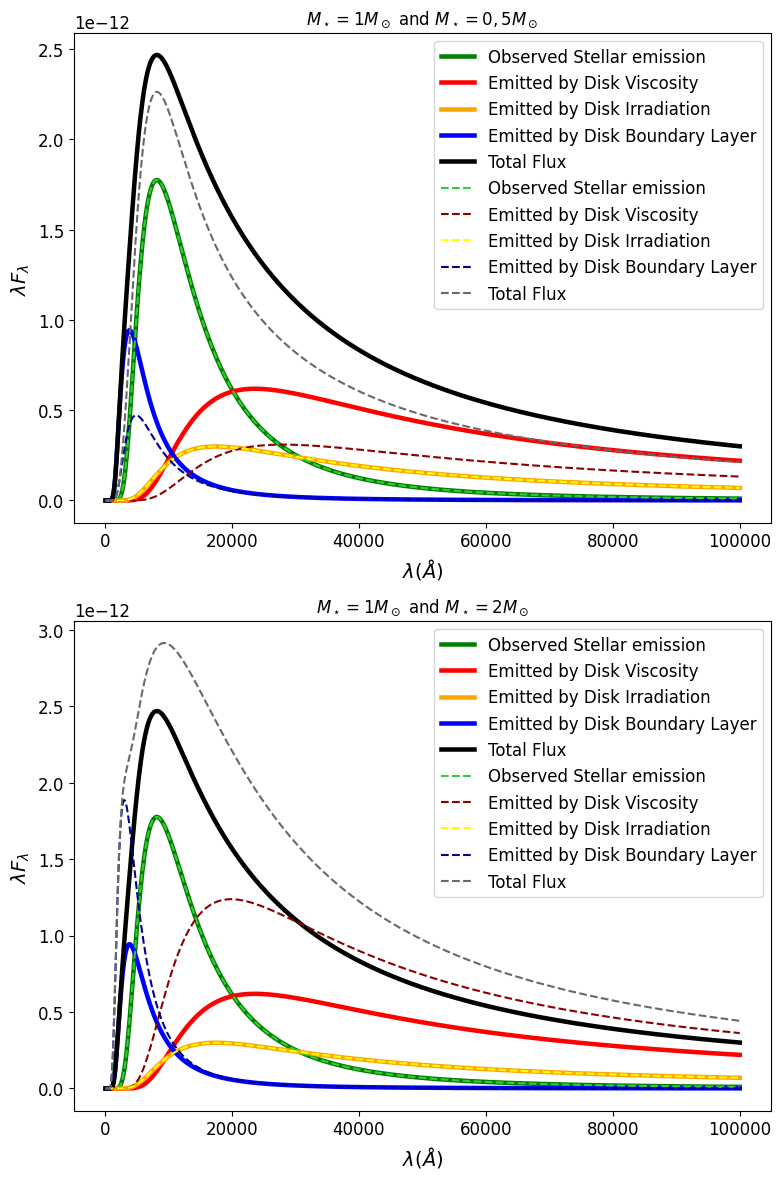

In [670]:
fig,axis = plt.subplots(nrows=2,ncols=1,figsize=(9,14))

axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe,    lw = 3.25,  color="green", label="Observed Stellar emission")
axis[0].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, lw = 3.25, color="red", label="Emitted by Disk Viscosity")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_irr*arr_lambe,   lw = 3.25, color="orange", label="Emitted by Disk Irradiation")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_BL*arr_lambe,    lw = 3.25, color="blue", label="Emitted by Disk Boundary Layer")
axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe + Flux_DiskVisc_l*arr_lambe  
          + Flux_Disk_irr*arr_lambe + Flux_Disk_BL*arr_lambe , lw = 3.25, color="k", label="Total Flux")

axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l2*arr_lambe, "--", color="limegreen", label="Observed Stellar emission")
axis[0].plot(arr_lambe/10**-10, Flux_DiskVisc_2*arr_lambe,"--", color="darkred",label="Emitted by Disk Viscosity")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_irr2*arr_lambe, "--", color="yellow",label="Emitted by Disk Irradiation")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_BL2*arr_lambe, "--", color="darkblue",label="Emitted by Disk Boundary Layer")
axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l2*arr_lambe + Flux_DiskVisc_2*arr_lambe
          + Flux_Disk_irr2*arr_lambe + Flux_Disk_BL2*arr_lambe , "--", color="dimgrey", label="Total Flux")
axis[0].set_ylabel(r"$\lambda F_\lambda$ ")
axis[0].set_xlabel(r"$\lambda (\AA)$")
axis[0].legend()
axis[0].set_title(r"$M_\star = 1 M_\odot$ and $M_\star = 0,5 M_\odot$")

al = 1
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe,    lw = 3.25, color="green",    alpha=al, label="Observed Stellar emission")
axis[1].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, lw = 3.25, color="red",      alpha=al, label="Emitted by Disk Viscosity")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_irr*arr_lambe,   lw = 3.25, color="orange",   alpha=al, label="Emitted by Disk Irradiation")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_BL*arr_lambe,    lw = 3.25, color="blue",     alpha=al, label="Emitted by Disk Boundary Layer")
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe + Flux_DiskVisc_l*arr_lambe  
          + Flux_Disk_irr*arr_lambe + Flux_Disk_BL*arr_lambe , lw = 3.25, color="k",    alpha=al, label="Total Flux")

axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l3*arr_lambe, "--", color="limegreen",label="Observed Stellar emission")
axis[1].plot(arr_lambe/10**-10, Flux_DiskVisc_3*arr_lambe,"--", color="darkred",label="Emitted by Disk Viscosity")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_irr3*arr_lambe, "--", color="yellow",label="Emitted by Disk Irradiation")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_BL3*arr_lambe, "--", color="darkblue",label="Emitted by Disk Boundary Layer")
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l3*arr_lambe + Flux_DiskVisc_3*arr_lambe
          + Flux_Disk_irr3*arr_lambe + Flux_Disk_BL3*arr_lambe , "--", color="dimgrey", label="Total Flux")
axis[1].set_ylabel(r"$\lambda F_\lambda$ ")
axis[1].set_xlabel(r"$\lambda (\AA)$")
axis[1].legend()
axis[1].set_title(r"$M_\star = 1 M_\odot$ and $M_\star = 2 M_\odot$")

plt.savefig("SED_stellar_mass.png")
plt.show()

Variation of Temperature

C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: overflow encountered in exp
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)


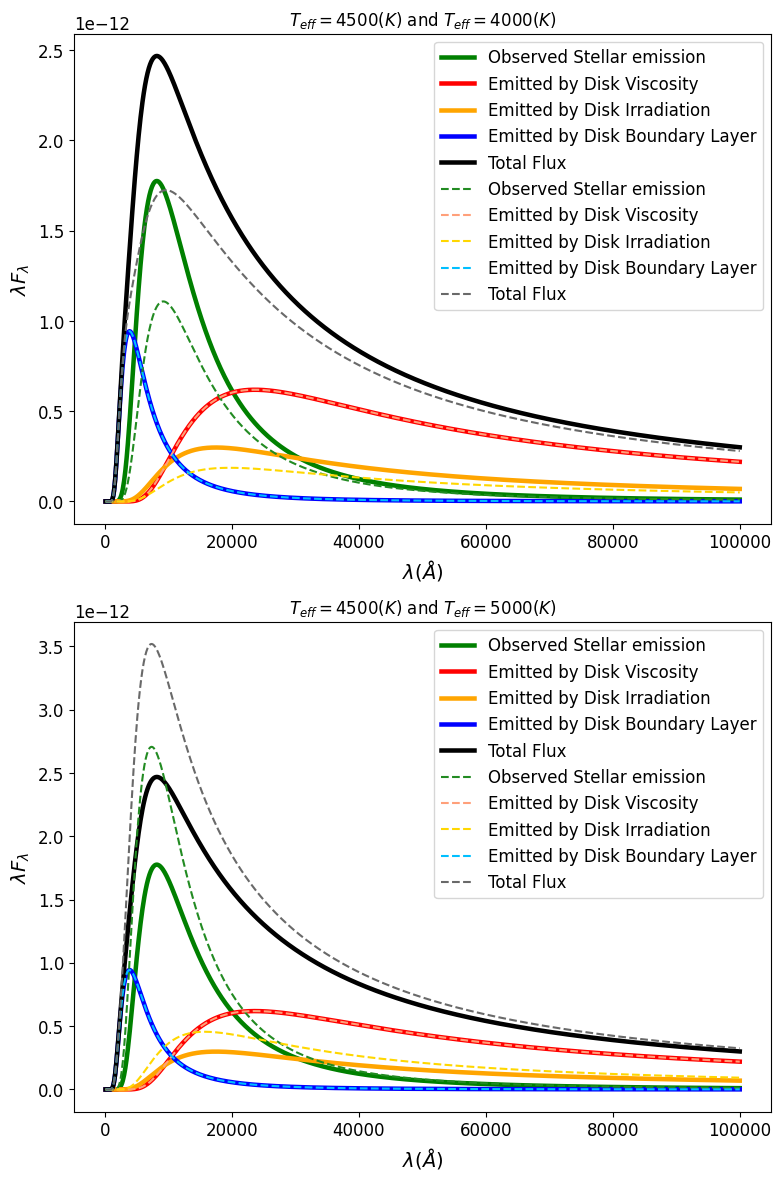

In [671]:
# Stellar Component
Fluxes_S_l2 = F_star_l(T_eff2, arr_lambe)
Fluxes_obs_l2 = F_obs(Fluxes_S_l2, R_star, d_star)

Fluxes_S_l3 = F_star_l(T_eff3, arr_lambe)
Fluxes_obs_l3 = F_obs(Fluxes_S_l3, R_star, d_star)

# Viscosity Component
Flux_DiskVisc_2 = np.empty(Npts)
for index in range(Npts):
    Flux_DiskVisc_2[index] = F_Disk_visc_lambe(Inclination, d_star, arr_lambe[index], arr_r2)

Flux_DiskVisc_3 = np.empty(Npts)
for index in range(Npts):
    Flux_DiskVisc_3[index] = F_Disk_visc_lambe(Inclination, d_star, arr_lambe[index], arr_r2)

# Irradiation Component
Flux_Disk_irr2 = F_irr(arr_lambe, rr, Teff=T_eff2)
Flux_Disk_irr3 = F_irr(arr_lambe, rr, Teff=T_eff3)

# Boundary Layer Component
Flux_Disk_BL3 = F_Disk_BL(Inclination, d_star, arr_lambe)
Flux_Disk_BL2 = F_Disk_BL(Inclination, d_star, arr_lambe)


# Ploting
fig,axis = plt.subplots(nrows=2,ncols=1,figsize=(9,14))

axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe,    lw = 3.25,  color="green", label="Observed Stellar emission")
axis[0].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, lw = 3.25, color="red", label="Emitted by Disk Viscosity")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_irr*arr_lambe,   lw = 3.25, color="orange", label="Emitted by Disk Irradiation")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_BL*arr_lambe,    lw = 3.25, color="blue", label="Emitted by Disk Boundary Layer")
axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe + Flux_DiskVisc_l*arr_lambe  
          + Flux_Disk_irr*arr_lambe + Flux_Disk_BL*arr_lambe , lw = 3.25, color="k", label="Total Flux")

axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l2*arr_lambe, "--", color="forestgreen", label="Observed Stellar emission")
axis[0].plot(arr_lambe/10**-10, Flux_DiskVisc_2*arr_lambe,"--", color="lightsalmon",label="Emitted by Disk Viscosity")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_irr2*arr_lambe, "--", color="gold",label="Emitted by Disk Irradiation")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_BL2*arr_lambe, "--", color="deepskyblue",label="Emitted by Disk Boundary Layer")
axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l2*arr_lambe + Flux_DiskVisc_2*arr_lambe
          + Flux_Disk_irr2*arr_lambe + Flux_Disk_BL2*arr_lambe , "--", color="dimgrey", label="Total Flux")
axis[0].set_ylabel(r"$\lambda F_\lambda$ ")
axis[0].set_xlabel(r"$\lambda (\AA)$")
axis[0].legend()
axis[0].set_title(r"$T_{eff} = 4500 (K)$ and $T_{eff} = 4000 (K)$")

al = 1
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe,    lw = 3.25, color="green",    alpha=al, label="Observed Stellar emission")
axis[1].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, lw = 3.25, color="red",      alpha=al, label="Emitted by Disk Viscosity")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_irr*arr_lambe,   lw = 3.25, color="orange",   alpha=al, label="Emitted by Disk Irradiation")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_BL*arr_lambe,    lw = 3.25, color="blue",     alpha=al, label="Emitted by Disk Boundary Layer")
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe + Flux_DiskVisc_l*arr_lambe  
          + Flux_Disk_irr*arr_lambe + Flux_Disk_BL*arr_lambe , lw = 3.25, color="k",    alpha=al, label="Total Flux")

axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l3*arr_lambe, "--", color="forestgreen",label="Observed Stellar emission")
axis[1].plot(arr_lambe/10**-10, Flux_DiskVisc_3*arr_lambe,"--", color="lightsalmon",label="Emitted by Disk Viscosity")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_irr3*arr_lambe, "--", color="gold",label="Emitted by Disk Irradiation")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_BL3*arr_lambe, "--", color="deepskyblue",label="Emitted by Disk Boundary Layer")
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l3*arr_lambe + Flux_DiskVisc_3*arr_lambe
          + Flux_Disk_irr3*arr_lambe + Flux_Disk_BL3*arr_lambe , "--", color="dimgrey", label="Total Flux")
axis[1].set_ylabel(r"$\lambda F_\lambda$ ")
axis[1].set_xlabel(r"$\lambda (\AA)$")
axis[1].legend()
axis[1].set_title(r"$T_{eff} = 4500 (K)$ and $T_{eff} = 5000 (K)$")

plt.savefig("SED_stellar_temperature.png")
plt.show()

Variation in Mass Accreation

C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: overflow encountered in exp
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)
C:\Users\tiago\AppData\Local\Temp\ipykernel_18236\1718102371.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  B = 2*h*c**2 / lambe**5 * 1/(np.exp( h*c/(lambe*k_B*T) ) -1)


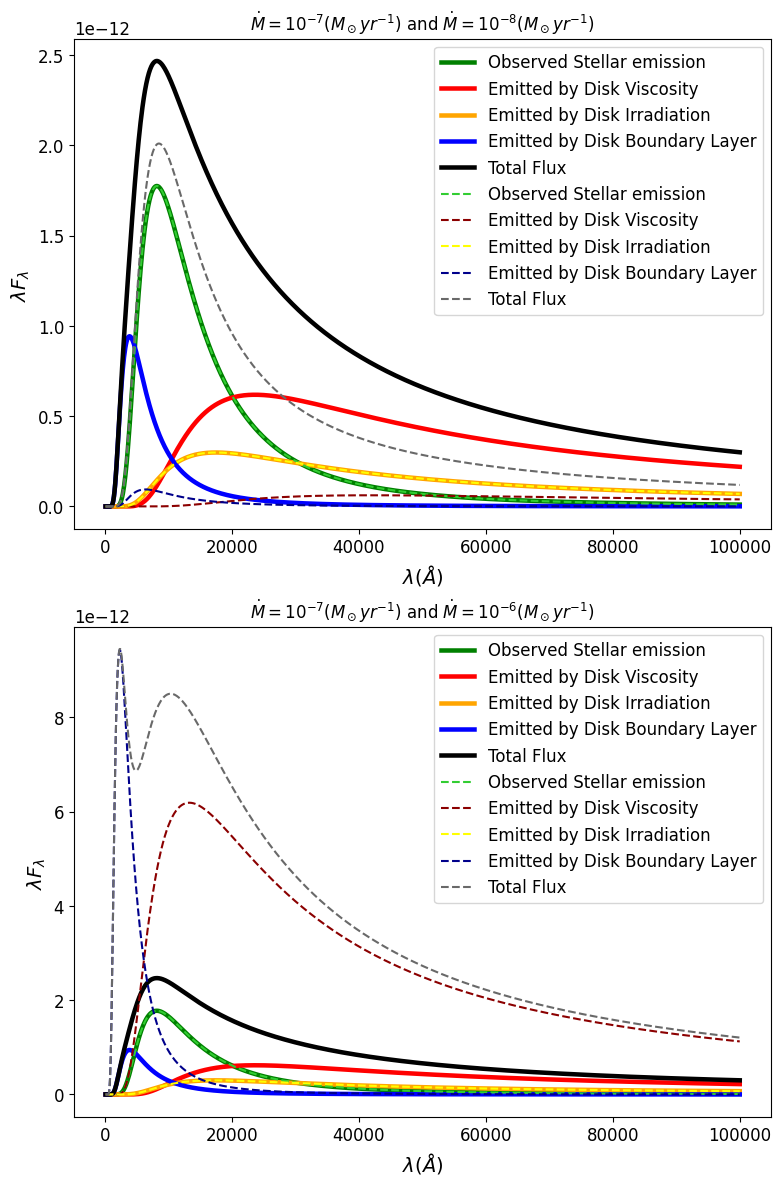

In [672]:
# Stellar Component
Fluxes_S_l2 = F_star_l(T_eff, arr_lambe)
Fluxes_obs_l2 = F_obs(Fluxes_S_l2, R_star, d_star)

Fluxes_S_l3 = F_star_l(T_eff, arr_lambe)
Fluxes_obs_l3 = F_obs(Fluxes_S_l3, R_star, d_star)

# Viscosity Component
Flux_DiskVisc_2 = np.empty(Npts)
for index in range(Npts):
    Flux_DiskVisc_2[index] = F_Disk_visc_lambe(Inclination, d_star, arr_lambe[index], arr_r2, Mass_accr=Mass_accr2)

Flux_DiskVisc_3 = np.empty(Npts)
for index in range(Npts):
    Flux_DiskVisc_3[index] = F_Disk_visc_lambe(Inclination, d_star, arr_lambe[index], arr_r2, Mass_accr=Mass_accr3)

# Irradiation Component
Flux_Disk_irr2 = F_irr(arr_lambe, rr)
Flux_Disk_irr3 = F_irr(arr_lambe, rr)

# Boundary Layer Component
Flux_Disk_BL2 = F_Disk_BL(Inclination, d_star, arr_lambe, Mass_accr=Mass_accr2)
Flux_Disk_BL3 = F_Disk_BL(Inclination, d_star, arr_lambe, Mass_accr=Mass_accr3)


# Ploting
fig,axis = plt.subplots(nrows=2,ncols=1,figsize=(9,14))


axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe,    lw = 3.25,  color="green", label="Observed Stellar emission")
axis[0].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, lw = 3.25, color="red", label="Emitted by Disk Viscosity")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_irr*arr_lambe,   lw = 3.25, color="orange", label="Emitted by Disk Irradiation")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_BL*arr_lambe,    lw = 3.25, color="blue", label="Emitted by Disk Boundary Layer")
axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe + Flux_DiskVisc_l*arr_lambe  
          + Flux_Disk_irr*arr_lambe + Flux_Disk_BL*arr_lambe , lw = 3.25, color="k", label="Total Flux")

axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l2*arr_lambe, "--", color="limegreen", label="Observed Stellar emission")
axis[0].plot(arr_lambe/10**-10, Flux_DiskVisc_2*arr_lambe,"--", color="darkred",label="Emitted by Disk Viscosity")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_irr2*arr_lambe, "--", color="yellow",label="Emitted by Disk Irradiation")
axis[0].plot(arr_lambe/10**-10, Flux_Disk_BL2*arr_lambe, "--", color="darkblue",label="Emitted by Disk Boundary Layer")
axis[0].plot(arr_lambe/10**-10, Fluxes_obs_l2*arr_lambe + Flux_DiskVisc_2*arr_lambe
          + Flux_Disk_irr2*arr_lambe + Flux_Disk_BL2*arr_lambe , "--", color="dimgrey", label="Total Flux")
axis[0].set_ylabel(r"$\lambda F_\lambda$ ")
axis[0].set_xlabel(r"$\lambda (\AA)$")
axis[0].legend()
axis[0].set_title(r"$\dot M = 10^{-7} (M_\odot yr^{-1})$ and $\dot M = 10^{-8} (M_\odot yr^{-1})$")


al = 1
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe,    lw = 3.25, color="green",    alpha=al, label="Observed Stellar emission")
axis[1].plot(arr_lambe/10**-10, Flux_DiskVisc_l*arr_lambe, lw = 3.25, color="red",      alpha=al, label="Emitted by Disk Viscosity")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_irr*arr_lambe,   lw = 3.25, color="orange",   alpha=al, label="Emitted by Disk Irradiation")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_BL*arr_lambe,    lw = 3.25, color="blue",     alpha=al, label="Emitted by Disk Boundary Layer")
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l*arr_lambe + Flux_DiskVisc_l*arr_lambe  
          + Flux_Disk_irr*arr_lambe + Flux_Disk_BL*arr_lambe , lw = 3.25, color="k",    alpha=al, label="Total Flux")

axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l3*arr_lambe, "--", color="limegreen",label="Observed Stellar emission")
axis[1].plot(arr_lambe/10**-10, Flux_DiskVisc_3*arr_lambe,"--", color="darkred",label="Emitted by Disk Viscosity")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_irr3*arr_lambe, "--", color="yellow",label="Emitted by Disk Irradiation")
axis[1].plot(arr_lambe/10**-10, Flux_Disk_BL3*arr_lambe, "--", color="darkblue",label="Emitted by Disk Boundary Layer")
axis[1].plot(arr_lambe/10**-10, Fluxes_obs_l3*arr_lambe + Flux_DiskVisc_3*arr_lambe
          + Flux_Disk_irr3*arr_lambe + Flux_Disk_BL3*arr_lambe , "--", color="dimgrey", label="Total Flux")
axis[1].set_ylabel(r"$\lambda F_\lambda$ ")
axis[1].set_xlabel(r"$\lambda (\AA)$")
axis[1].legend()
axis[1].set_title(r"$\dot M = 10^{-7} (M_\odot yr^{-1})$ and $\dot M = 10^{-6} (M_\odot yr^{-1})$")

plt.savefig("SED_mass_accreation.png")
plt.show()

## Tempo

In [673]:
#################################### Tempo total que o programa demora a correr ############################################
t1=time.time()
print("O código do notebook inteiro demorou um total de {} min e {} segundos a correr.".format((t1-T0)//60,int((t1-T0)%60)))

O código do notebook inteiro demorou um total de 1.0 min e 35 segundos a correr.
